In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['species'] = data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [17]:
#independent and dependent features
# x = df.drop('species',axis=1)
# y = df['species']
x = df.drop(labels='species', axis = 1)
y = df["species"]

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)
# y_test.isnull().sum()

In [19]:
#pre prunning method
from sklearn.tree import DecisionTreeClassifier
treemodel = DecisionTreeClassifier()

from sklearn.model_selection import GridSearchCV

parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':[None, 'sqrt', 'log2'] 
}

cv = GridSearchCV(treemodel,param_grid=parameter,cv=5,scoring="accuracy")

cv.fit(x_train,y_train)



,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy', ...], 'max_depth': [1, 2, ...], 'max_features': [None, 'sqrt', ...], 'splitter': ['best', 'random']}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


In [20]:
cv.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': None,
 'splitter': 'random'}

In [21]:
pred = cv.predict(x_test)

In [22]:
from sklearn.metrics import accuracy_score,classification_report
score = accuracy_score(y_test, pred)
print(score)
print(classification_report(y_test,pred))

0.88
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.60      0.75        15
           2       0.73      1.00      0.84        16

    accuracy                           0.88        50
   macro avg       0.91      0.87      0.86        50
weighted avg       0.91      0.88      0.87        50



[Text(0.36363636363636365, 0.9, 'x[2] <= 4.032\nentropy = 1.583\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.18181818181818182, 0.7, 'x[3] <= 0.938\nentropy = 0.854\nsamples = 43\nvalue = [31.0, 12.0, 0.0]'),
 Text(0.2727272727272727, 0.8, 'True  '),
 Text(0.09090909090909091, 0.5, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.2727272727272727, 0.5, 'entropy = 0.0\nsamples = 12\nvalue = [0, 12, 0]'),
 Text(0.5454545454545454, 0.7, 'x[2] <= 4.386\nentropy = 0.973\nsamples = 57\nvalue = [0, 23, 34]'),
 Text(0.45454545454545453, 0.8, '  False'),
 Text(0.45454545454545453, 0.5, 'entropy = 0.0\nsamples = 9\nvalue = [0, 9, 0]'),
 Text(0.6363636363636364, 0.5, 'x[3] <= 1.478\nentropy = 0.871\nsamples = 48\nvalue = [0, 14, 34]'),
 Text(0.45454545454545453, 0.3, 'x[3] <= 1.377\nentropy = 0.592\nsamples = 7\nvalue = [0, 6, 1]'),
 Text(0.36363636363636365, 0.1, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(0.5454545454545454, 0.1, 'entropy = 0.811\nsamples = 4\nvalue = 

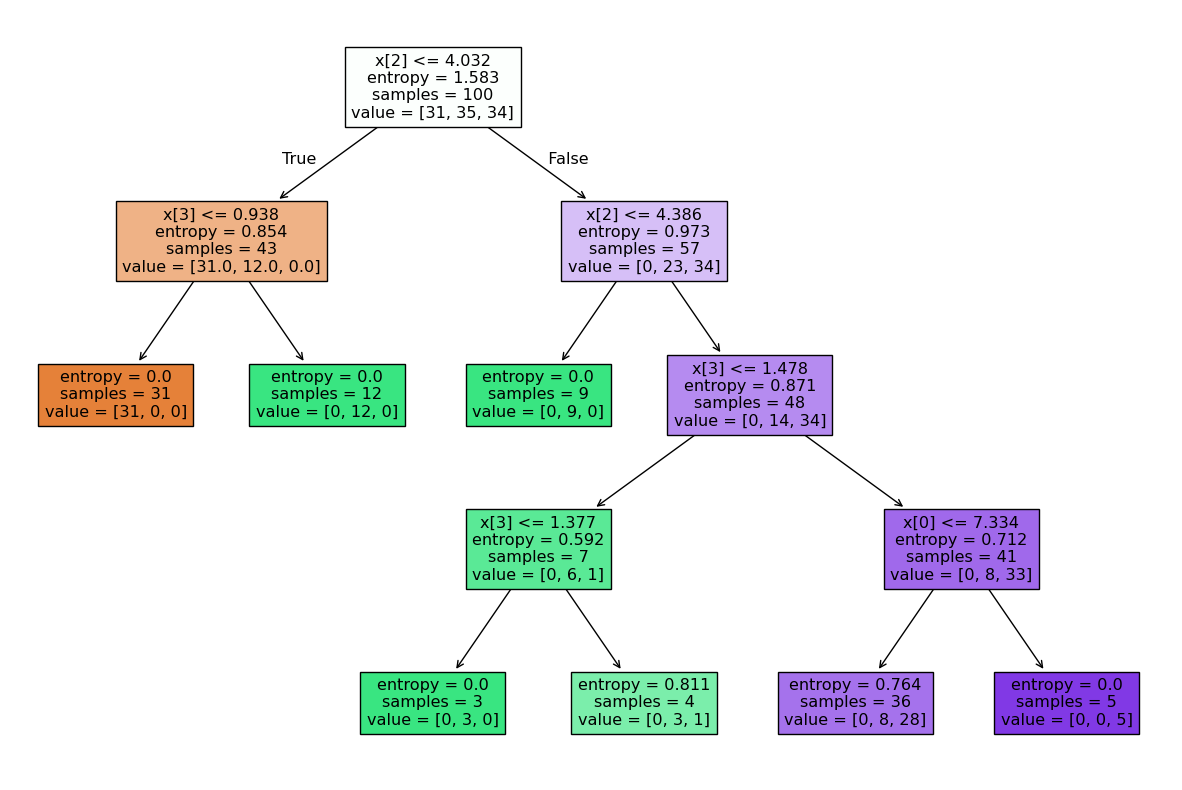

In [23]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(cv.best_estimator_, filled=True)